# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab, you will use the titanic dataset to see the impact of tree pruning and hyperparameter tuning on the predictive performance of a decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide much predictive power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. 

## Objectives

In this lab you will: 

- Determine the optimal hyperparameters for a decision tree model and evaluate the model performance

## Import necessary libraries

Let's first import the libraries you'll need for this lab. 

In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn-v0_8-darkgrid')

## Import the data

The titanic dataset, available in `'titanic.csv'`, is all cleaned up and preprocessed for you so that you can focus on pruning and optimization. Import the dataset and print the first five rows of the data: 

In [17]:
# Import the data
df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


## Create training and test sets

- Assign the `'Survived'` column to `y` 
- Drop the `'Survived'` and `'PassengerId'` columns from `df`, and assign the resulting DataFrame to `X` 
- Split `X` and `y` into training and test sets. Assign 30% to the test set and set the `random_state` to `SEED` 

In [18]:
# Create X and y 
y = df.Survived
X = df.drop(columns=['Survived', 'PassengerId'], axis=1)

# Split into training and test sets
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=SEED)


## Train a vanilla classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Instantiate a decision tree 
  - Use the `'entropy'` criterion and set the `random_state` to `SEED` 
- Fit this classifier to the training data 

In [19]:
# Train the classifier using training data
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=1)

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under the curve) to check the predictive performance

In [20]:
# Make predictions using test set 
y_pred =dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds =roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

np.float64(0.7367718101733446)

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree: 

- Create an array for `max_depth` values ranging from 1 - 32  
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results 

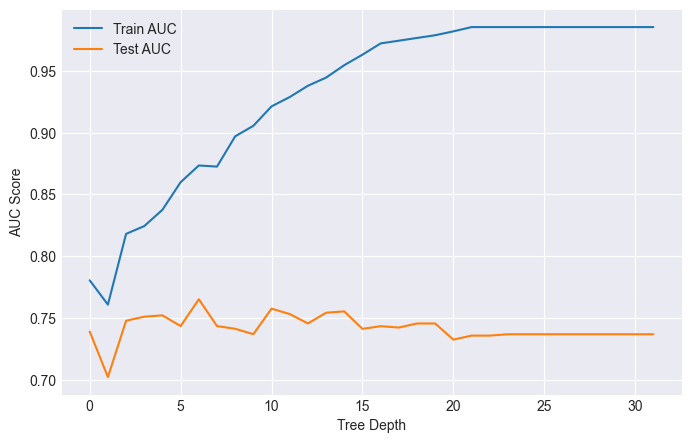

In [21]:
# Identify the optimal tree depth for given data
max_depth = range(1, 33)
train_auc = []
test_auc = []

for depth in max_depth:
    
    # Insantiate and train classifier
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=SEED)
    dt.fit(X_train, y_train)

    # Make predictions using train set 
    train_pred = dt.predict(X_train)
    
    # Make predictions using test set 
    y_pred = dt.predict(X_test)

    # Train AUC
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
    auc_train = auc(fpr_train, tpr_train)
    train_auc.append(auc_train)

    # Test AUC
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred)
    auc_test = auc(fpr_test, tpr_test)
    test_auc.append(auc_test)
    
# Plot train and test AUC
plt.figure(figsize=(8,5))
plt.plot(train_auc, label='Train AUC')
plt.plot(test_auc, label='Test AUC')
plt.xlabel('Tree Depth')
plt.ylabel('AUC Score')
plt.legend()
plt.show()


In [22]:
# Your observations here 
""" 
The optimal tree depth appears to be 6, which means the decision tree should have 6 levels. This is 
when the Test AUC is the highest, at approximately 76%. The Test AUC declines after this and the 
Train AUC continues to increase, which would cause overfitting of the model.
"""

' \nThe optimal tree depth appears to be 6, which means the decision tree should have 6 levels. This is \nwhen the Test AUC is the highest, at approximately 76%. The Test AUC declines after this and the \nTrain AUC continues to increase, which would cause overfitting of the model.\n'

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree 

- Create an array for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

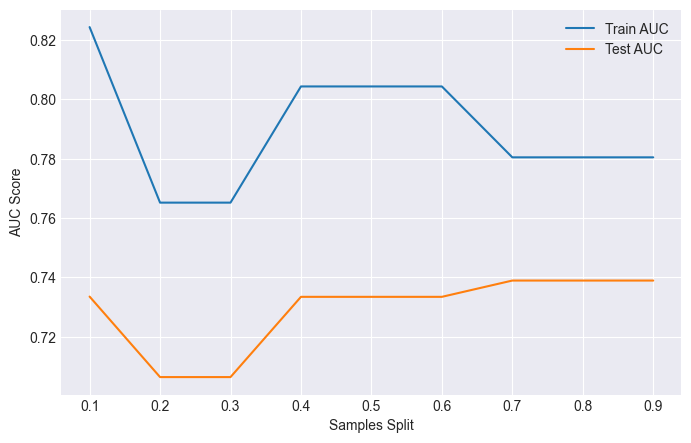

In [23]:
# Identify the optimal min-samples-split for given data
min_samples_split = np.arange(0.1, 1, step=0.1)
train_auc = []
test_auc = []

for split in min_samples_split:
    
    # Insantiate and train classifier
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=split, random_state=SEED)
    dt.fit(X_train, y_train)

    # Make predictions using train set 
    train_pred = dt.predict(X_train)
    
    # Make predictions using test set 
    y_pred = dt.predict(X_test)

    # Train AUC
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
    auc_train = auc(fpr_train, tpr_train)
    train_auc.append(auc_train)

    # Test AUC
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred)
    auc_test = auc(fpr_test, tpr_test)
    test_auc.append(auc_test)
    
# Plot train and test AUC
plt.figure(figsize=(8,5))
plt.plot(min_samples_split, train_auc, label='Train AUC')
plt.plot(min_samples_split, test_auc, label='Test AUC')
plt.xlabel('Samples Split')
plt.ylabel('AUC Score')
plt.legend()
plt.show()



In [24]:
# Your observations here
# Your observations here
"""
0.7 appears to be the most optimal for min_samples_split, as the Test AUC reaches its maximum at 
that point. The Train AUC stabilizes at that sample split number, as well.
"""

'\n0.7 appears to be the most optimal for min_samples_split, as the Test AUC reaches its maximum at \nthat point. The Train AUC stabilizes at that sample split number, as well.\n'

## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree 

- Create an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

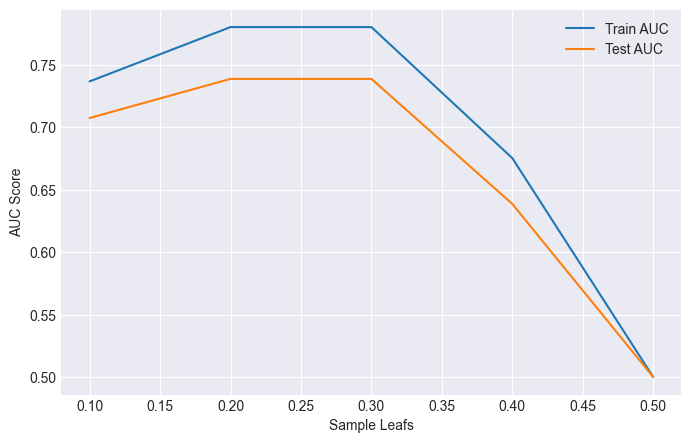

In [25]:
# Calculate the optimal value for minimum sample leafs
# Calculate the optimal value for minimum sample leafs
min_samples_leaf = np.arange(0.1, 0.6, step=0.1)

train_auc = []
test_auc = []

for leaf in min_samples_leaf:
    
    # Insantiate and train classifier
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=leaf, random_state=SEED)
    dt.fit(X_train, y_train)

    # Make predictions using train set 
    train_pred = dt.predict(X_train)
    
    # Make predictions using test set 
    y_pred = dt.predict(X_test)

    # Train AUC
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
    auc_train = auc(fpr_train, tpr_train)
    train_auc.append(auc_train)

    # Test AUC
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred)
    auc_test = auc(fpr_test, tpr_test)
    test_auc.append(auc_test)
    
# Plot train and test AUC
plt.figure(figsize=(8,5))
plt.plot(min_samples_leaf, train_auc, label='Train AUC')
plt.plot(min_samples_leaf, test_auc, label='Test AUC')
plt.xlabel('Sample Leafs')
plt.ylabel('AUC Score')
plt.legend()
plt.show()


In [26]:
# Your observations here 
"""
Both the Train AUC and Test AUC stabalize between 0.2 and 0.3. They both decline drastically after 
0.3 sample leafs, therefore, this is the best value.
"""



'\nBoth the Train AUC and Test AUC stabalize between 0.2 and 0.3. They both decline drastically after \n0.3 sample leafs, therefore, this is the best value.\n'

## Maximum Features

Now check for the best `max_features` parameter value for our decision tree 

- Create an array for `max_features` values ranging from 1 - 12 (1 feature vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

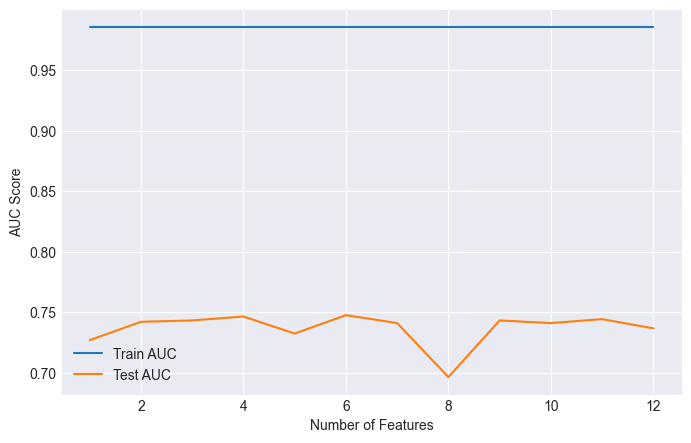

In [27]:
# Find the best value for optimal maximum feature size
max_features = range(1, 13)

train_auc = []
test_auc = []

for feature in max_features:
    
    # Insantiate and train classifier
    dt = DecisionTreeClassifier(criterion='entropy', max_features=feature, random_state=SEED)
    dt.fit(X_train, y_train)

    # Make predictions using train set 
    train_pred = dt.predict(X_train)
    
    # Make predictions using test set 
    y_pred = dt.predict(X_test)

    # Train AUC
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
    auc_train = auc(fpr_train, tpr_train)
    train_auc.append(auc_train)

    # Test AUC
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred)
    auc_test = auc(fpr_test, tpr_test)
    test_auc.append(auc_test)
    # Plot train and test AUC
plt.figure(figsize=(8,5))
plt.plot(max_features, train_auc, label='Train AUC')
plt.plot(max_features, test_auc, label='Test AUC')
plt.xlabel('Number of Features')
plt.ylabel('AUC Score')
plt.legend()
plt.show()
    

In [28]:
# Your observations here
"""
The number of features does not effect the Train AUC. The Test AUC is the highest at 7 features, 
although it remains fairly steady across the graph.
"""

'\nThe number of features does not effect the Train AUC. The Test AUC is the highest at 7 features, \nalthough it remains fairly steady across the graph.\n'

## Re-train the classifier with chosen values

Now we will use the best values from each training phase above and feed it back to our classifier. Then we can see if there is any improvement in predictive performance. 

- Train the classifier with the optimal values identified 
- Compare the AUC of the new model with the earlier vanilla decision tree AUC 
- Interpret the results of the comparison

In [29]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=0.7,
    min_samples_leaf=0.3,
    criterion='entropy', 
    max_features=7, 
    random_state=SEED)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


false_positive_rate, true_positive_rate, thresholds =roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

np.float64(0.6387325944870701)

In [30]:
# Your observations here
# Your observations here
"""
This AUC is worse than the vanilla decision tree before specifying hyperparameters.
"""

'\nThis AUC is worse than the vanilla decision tree before specifying hyperparameters.\n'

In order to address the issue of a baseline classifier performing better than a tuned one like this, a more-sophisticated technique is called a "grid search" and this will be introduced in a future lesson.

## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid overfitting and increasing the generalization capabilities of the classifier. For the titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 